In [25]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os 
# Load a single image
image_path = "cat.jpg"
original_image = Image.open(image_path)

# Define augmentation transformations
augmentations = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=1),  # Flip image
    transforms.RandomRotation(30),  # Rotate image
    transforms.ColorJitter(brightness=0.5, contrast=0.5),  # Adjust brightness & contrast
    transforms.RandomPerspective(distortion_scale=0.5, p=1),  # Perspective change
    transforms.RandomResizedCrop(224, scale=(0.7, 1.0)),  # Random crop
    transforms.ToTensor()
])


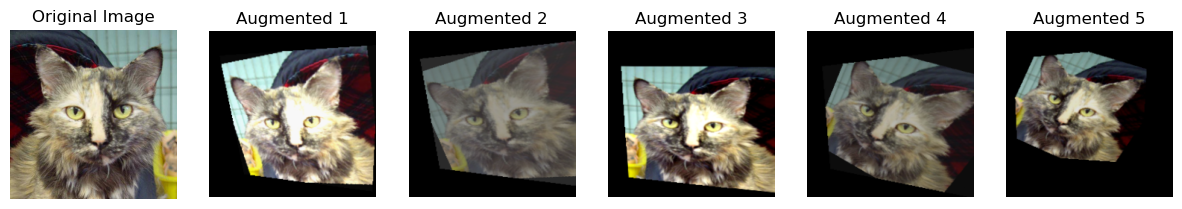

In [26]:
# Generate multiple augmented images
num_augmented_images = 5
fig, axes = plt.subplots(1, num_augmented_images+1, figsize=(15, 5))

# Show the original image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Generate and show augmented images
for i in range(num_augmented_images):
    augmented_image = augmentations(original_image)  # Apply augmentation
    axes[i+1].imshow(augmented_image.permute(1, 2, 0))  # Convert tensor to image
    axes[i+1].set_title(f"Augmented {i+1}")
    axes[i+1].axis("off")

plt.show()


In [27]:
# Create a directory to save augmented images
save_dir = "augmented_images"
os.makedirs(save_dir, exist_ok=True)

# Generate and save multiple augmented images
num_augmented_images = 5
for i in range(num_augmented_images):
    augmented_image = augmentations(original_image)  # Apply augmentation
    
    # Convert tensor back to PIL image
    augmented_pil = transforms.ToPILImage()(augmented_image)

    # Save image
    save_path = os.path.join(save_dir, f"augmented_{i+1}.jpg")
    augmented_pil.save(save_path)

    print(f"Saved: {save_path}")

Saved: augmented_images\augmented_1.jpg
Saved: augmented_images\augmented_2.jpg
Saved: augmented_images\augmented_3.jpg
Saved: augmented_images\augmented_4.jpg
Saved: augmented_images\augmented_5.jpg
